<p>Abderrahman BENYAHYA</p>
9 June 2019

# Project: Investigating players attributes' in the European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Since I am not fond of Football but also because I wanted to make some use of SQL queries, I have decided to work on the European Soccer Database. This is to force myself to work on something I am not used to, to learn something new and to use the knowledge I learnt from Udacity.

>The first difficulty was to select the data and I had to struggle to understand the structure. I through it could be easy to extract the data of player, match and team in one dataset but, due to lack of time and skills (I know it could be possible but using advanced function of SQL), I decided to narrow the scope to the Players and their attributes

> I used the following query in the SB Browser(SQlite) software:
<i>
    >><p>
SELECT p.player_name, DATE - p.birthday as age, p.height,p.weight, pa.overall_rating, pa.penalties, count(pa.date) nb_match, pa.aggression, pa.preferred_foot</p>
>><p>FROM Player p </p>
>><p>JOIN Player_Attributes pa </p>
>><p>ON p.player_api_id = pa.player_api_id </p>
>><p>GROUP BY 1<p/>
>><p>ORDER BY 5 DESC</p></i>

>I have uploaded the CSV file and will explore using pandas, numpy and matplotlib libraries. I will first check the dataset for any errors, then clean the data to have coherent information to make analysis. The question is to see if there is any relation between the overall rating of the players and their physical constitution (age, height, weight or BMI) in the first analysis. Then to see the link with the play, elements which are not related directly with the rating (penalties, number of match, preferred foot).

In [4]:
# First I have to import pandas, numpy and use the 'magic word' %matplotlib followed with inline. 
# I had to use the import of matplotlib.pyplot as I am using the library to make comparison

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis. 

### General Properties

In [6]:
# I loaded the data and view the first five lines
df = pd.read_csv('European_Soccer_Database_Players.csv')
df.head(5)

,player_name,age,height,weight,overall_rating,penalties,nb_match,aggression,preferred_foot
0,Lionel Messi,28,170.18,159,94,74,26,48,left
1,Cristiano Ronaldo,30,185.42,176,93,85,25,62,right
2,Luis Suarez,28,182.88,187,90,85,40,78,right
3,Manuel Neuer,30,193.04,203,90,37,29,29,right
4,Neymar,24,175.26,150,90,81,25,56,right


In [7]:
# I printed also the last five lines
df.tail(5)

,player_name,age,height,weight,overall_rating,penalties,nb_match,aggression,preferred_foot
10843,Robin Huser,18,180.34,154,47,56,8,51,right
10844,Benjamin Fischer,28,175.26,157,46,53,2,53,right
10845,Emir Sinanovic,22,180.34,154,46,33,4,22,left
10846,Liam Hughes,20,177.80,150,46,36,2,22,right
10847,Frederic Schaub,23,180.34,154,42,35,4,46,right


In [8]:
#To see if there is any inconsistencies between the type of data and the expected result but also any missing data I used info()
#we can see that there are no errors for each row
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10848 entries, 0 to 10847
Data columns (total 9 columns):
player_name       10848 non-null object
age               10848 non-null int64
height            10848 non-null float64
weight            10848 non-null int64
overall_rating    10848 non-null int64
penalties         10848 non-null int64
nb_match          10848 non-null int64
aggression        10848 non-null int64
preferred_foot    10848 non-null object
dtypes: float64(1), int64(6), object(2)
memory usage: 762.8+ KB


In [9]:
#We need to see if there is any duplicated line in the dataset by using duplicated() and see the number with sum()
#We can see that there are no duplicated data
df.duplicated().sum()

0

In [10]:
#We check if there are no NAN values
#Indeed, there are none.
pd.isna(df).values.sum()

0

In [11]:
#we see there are no null values
pd.isnull(df).values.sum()

0

In [12]:
#We use decribe to see inconsistencies in the database
#We can see that there are big discrepancies in three rows: the weight, the penalties and the aggression
#we can see that the weight is not given in Kg but in Lb and that the height is given in cm
# we need to convert the weight in KG and the height in meter to have consistent data.
#(we can see that for Messi 1,70m,72Kg)
df.describe()

,age,height,weight,overall_rating,penalties,nb_match,aggression
count,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000,10848.000000
mean,27.970778,181.874115,168.377028,67.931969,53.452895,16.959624,61.055771
std,4.774376,6.361649,14.991617,6.323781,15.846223,9.915408,16.225414
min,17.000000,157.480000,117.000000,42.000000,7.000000,2.000000,11.000000
25%,24.000000,177.800000,159.000000,64.000000,44.000000,9.000000,52.000000
50%,28.000000,182.880000,168.000000,68.000000,55.000000,16.000000,64.000000
75%,32.000000,185.420000,179.000000,72.000000,65.000000,24.000000,73.000000
max,44.000000,208.280000,243.000000,94.000000,96.000000,108.000000,94.000000




### Data Cleaning 
#### we will convert the data from lb to kg and cm to meter and create a new column 'bmi' in order to ease comparison

<p>There are no missing values or duplicated data however the weight is given in Lb and the height cm</p>

<p> We will first convert the weight in Kg then the height into meters to have a value that can be compared and combining both height and weight we will create a column bmi (Body Mass Index)</p>


In [13]:
#The first part is to found the value used to convert lb to kg which is  2.2046226218 
#then we apply the conversion to the row "weight" by dividing by the number
convertor =  2.2046226218 
df["weight"]=df["weight"]/ convertor

In [14]:
#to convert the height is much easier we just have to divide by 100
df["height"] = df["height"]/100

In [15]:
#creating the column "bmi" which calcultes the weight / height²
df["bmi"]= (df["weight"]/np.square(df["height"]))

In [16]:
#renaming the height as height(m) and weight as weight(kg)
df.rename(columns={"height":"height(m)", "weight":"weight(kg)"}, inplace=True)

In [17]:
#Check if everything is correct
df.head(5)

,player_name,age,height(m),weight(kg),overall_rating,penalties,nb_match,aggression,preferred_foot,bmi
0,Lionel Messi,28,1.7018,72.121187,94,74,26,48,left,24.902665
1,Cristiano Ronaldo,30,1.8542,79.832257,93,85,25,62,right,23.220163
2,Luis Suarez,28,1.8288,84.821773,90,85,40,78,right,25.361499
3,Manuel Neuer,30,1.9304,92.079251,90,37,29,29,right,24.709682
4,Neymar,24,1.7526,68.038856,90,81,25,56,right,22.150900


<a id='eda'></a>
## Exploratory Data Analysis



<h3>First of all we will inspect the data to see the distribution of each values. Then we will se if we have the same observation among the 100 most rated players.</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6A1903940>,
      dtype=object)

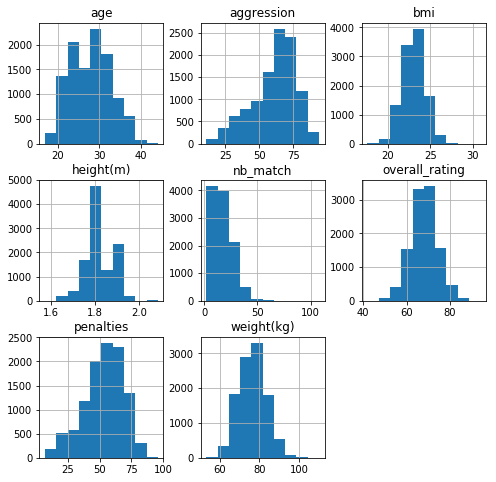

In [18]:
# We use hist() to have overview of the distribution of the all players
df.hist(figsize= [8,8])

In [19]:
#We cast the first 100 lines since the table was ordered by overall-rating (DESC) and create a new DF(best)
#We check that the entries are correct.

df_best= df[: 100]
df_best.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
player_name       100 non-null object
age               100 non-null int64
height(m)         100 non-null float64
weight(kg)        100 non-null float64
overall_rating    100 non-null int64
penalties         100 non-null int64
nb_match          100 non-null int64
aggression        100 non-null int64
preferred_foot    100 non-null object
bmi               100 non-null float64
dtypes: float64(3), int64(5), object(2)
memory usage: 7.9+ KB


array([[False, False, False],
       [False, False, False],
       [False, False, False]])

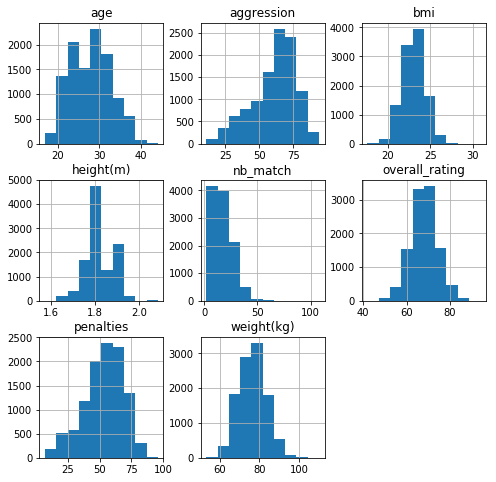

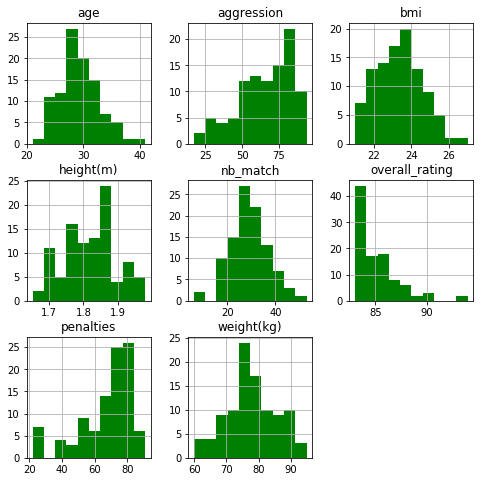

In [20]:
#we make a comparison between the two histograms which returns false for all (maybe de to the number in y also)
#we can see differences for each value
df.hist(figsize=[8,8]) == df_best.hist(figsize=[8,8], color='green')

<h3>The first comparison lets us understand that the values are a bit different for the 100 best rated players.</h3> 
   <h3>It is noticeable that the pysical condition (age, heigh, weight and bmi) but also the number and the way of playing play a role in the rating but the second one seems to be more exacerbated.</h3>


<h1> Research Question 1: relation between the rating and the physical condition of the players</h1>

### we will se first if there is a relation between the age of the players and the rating. We will see first what is the distribution of the age


In [21]:
#let's see the distribution of the age

df.age.describe()

count    10848.000000
mean        27.970778
std          4.774376
min         17.000000
25%         24.000000
50%         28.000000
75%         32.000000
max         44.000000
Name: age, dtype: float64

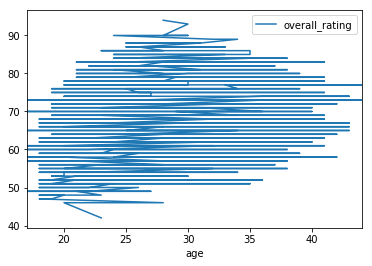

In [22]:
# To see any relation between age and overall_rating we use the function plot as fellow
df.plot(y="overall_rating", x="age")

### The interpretation of the plot is difficult to make but at leat we can see that the upper best rated player are bout 30 years old but also that the least rated are under 25 years old. the older players are found in the middle.
### To see in a more visualised manner we can define two DF young and old from the median age. And then see which are most rated.

In [23]:
#we define the median that will be used to separate the young and old
median = df["age"].median()

In [24]:
#we define old as superior to median
old = df.query('age > {}'.format(median))

#we define young as inferior to median
young = df.query('age < {}'.format(median))

In [25]:
# we calculate the mean overall rating for young and old
mean_rating_young = young['overall_rating'].mean()
mean_rating_old = old['overall_rating'].mean()


 The median age is 28.0 
 The mean rating for old players is 68 
 The mean rating for young players is 66


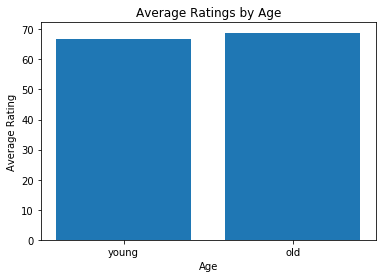

In [26]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_rating_young, mean_rating_old]
labels = ['young', 'old']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Ratings by Age')
plt.xlabel('Age')
plt.ylabel('Average Rating');
print('\n The median age is {} \n The mean rating for old players is {} \n The mean rating for young players is {}'.format(median, int(mean_rating_old),int(mean_rating_young)))

### It seems that in average, old (more than 28 years old) get better rating than younger players.


### Let's see the height, weight and bmi

>we use the bmi because it is a combined formula between height and weight that is a better base to compare

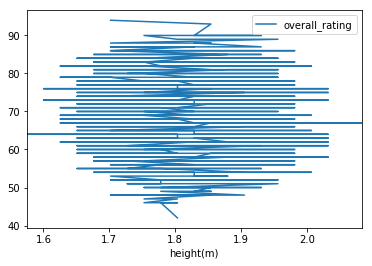

In [27]:
#we use plot to see relation between height and overall rating 
df.plot(y="overall_rating", x="height(m)")

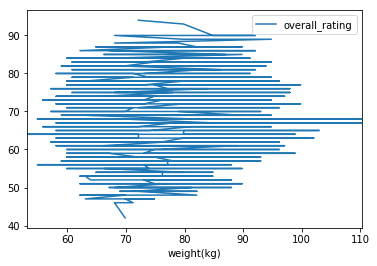

In [28]:
#we do the same with the weight
df.plot(y="overall_rating", x="weight(kg)")

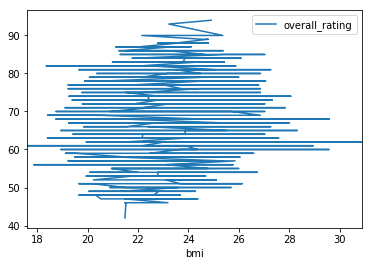

In [29]:
#we see the visualization for the bmi
df.plot(y="overall_rating", x="bmi")

### We can see that the most rated player have a moderate bmi (24-25) but the distribution is difficult to read. We will use the same methode we used above for the age.

In [30]:
median_bmi  = df["bmi"].median()
high_bmi = df.query('bmi > {}'.format(median_bmi))
low_bmi = df.query('bmi< {}'.format(median_bmi))
average_low_bmi = low_bmi["overall_rating"].mean()
average_high_bmi = high_bmi["overall_rating"].mean()


 The median bmi is 23 
 The mean rating for high bmi players is 68 
 The mean rating for low bmi players is 67


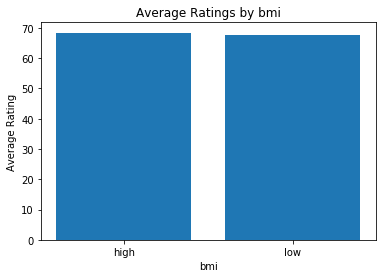

In [31]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [average_high_bmi, average_low_bmi]
labels = ['high', 'low']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Ratings by bmi')
plt.xlabel('bmi')
plt.ylabel('Average Rating');
print('\n The median bmi is {} \n The mean rating for high bmi players is {} \n The mean rating for low bmi players is {}'.format(int(median_bmi), int(average_high_bmi),int(average_low_bmi)))

##### According to the findings, players with bmi higher than 23 bmi are better rated than those who have lower bmi. But the difference is very slice.

<h1> Research Question 2: relation of the game of player to the rating (excluded from rating) </h1>

<h3> There are two subquestions: one about the negative behavior (aggression and penalties) the other the number of match played and preferred foot</h3>


<h3>We are wondering if agressivity and penalties and the rating. </h3>

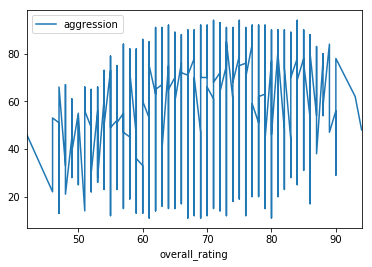

In [32]:
#let's first see the direct relation between rating and aggression and then with penalties using plot
df.plot(x='overall_rating', y='aggression')

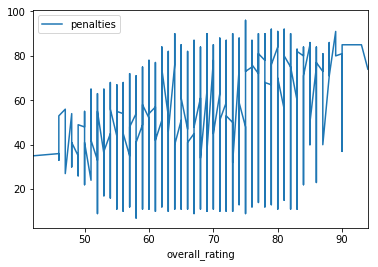

In [33]:
df.plot(x='overall_rating', y='penalties')

### From above, we can see that there is a slight positive relation between aggression, penalties and rating. 
### We need to investigate more in detail to see the relation by using the mean in the whole data set compared with the 100 best rated players

mean aggression for all plyer is 61 
mean aggression for the 100 best rated players is 66


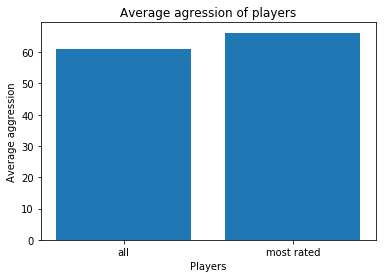

In [34]:
# We will see the mean for the all dataset and the mean for the 100 most rated players
# then we compare the result
mean_aggression = df["aggression"].mean()
mean_best_aggression= df_best["aggression"].mean()

print( 'mean aggression for all plyer is {} \nmean aggression for the 100 best rated players is {}'.format (int(mean_aggression), int(mean_best_aggression)))
locations = [1, 2]
heights = [mean_aggression, mean_best_aggression]
labels = ['all', 'most rated']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average agression of players')
plt.xlabel('Players')
plt.ylabel('Average aggression');

mean penalties for all player is 53 
mean penalties for the 100 best rated players is 67


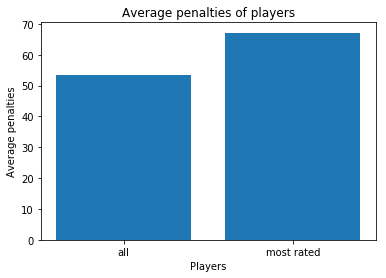

In [35]:
# We do the same or the penalties
mean_penalties = df["penalties"].mean()
mean_best_penalties= df_best["penalties"].mean()

print( 'mean penalties for all player is {} \nmean penalties for the 100 best rated players is {}'.format (int(mean_penalties), int(mean_best_penalties)))
locations = [1, 2]
heights = [mean_penalties, mean_best_penalties]
labels = ['all', 'most rated']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average penalties of players')
plt.xlabel('Players')
plt.ylabel('Average penalties');

<h3> It is very clear that there is a positive relation between the rating and the aggressivity and even more with penalties</h3>
<h2> Let's see relation with the number of match (number of date) and preferred foot with the rating </h2>

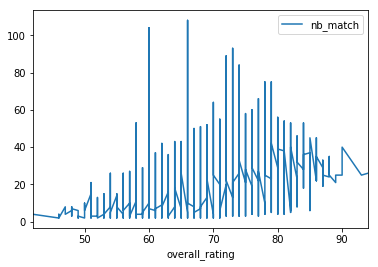

In [36]:
#We use first the plot method
df.plot(x='overall_rating', y='nb_match')

median number of match for all player is 16 
median number of match for the 100 best rated players is 29


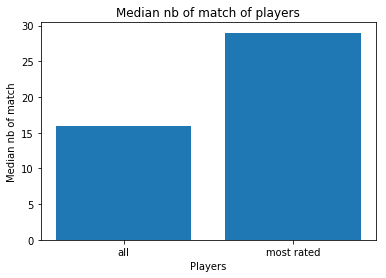

In [41]:
# the relation seems clearly positive but it can be showed best by using the median
all_nb_match_median = df['nb_match'].median()
best_nb_match_median = df_best['nb_match'].median()
print( 'median number of match for all player is {} \nmedian number of match for the 100 best rated players is {}'.format (int(all_nb_match_median), int(best_nb_match_median)))
locations = [1, 2]
heights = [all_nb_match_median, best_nb_match_median]
labels = ['all', 'most rated']
plt.bar(locations, heights, tick_label=labels)
plt.title('Median nb of match of players')
plt.xlabel('Players')
plt.ylabel('Median nb of match');

<h2> It is very clear that there is a positive relation between the number of match played and the rating, indeed the most rated players are to play more often! </h2>

<h2> Let's now see the preferred foot (right or left) if there is a correlation with rating!</h2>

the number of right preferred players is 8206
the number of left preferred players is 2642

the mean for left preferred foot is 67.99129447388343 
the mean for right preferred foot is 67.91286863270777


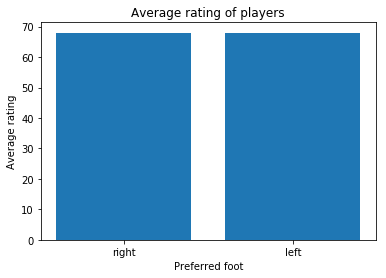

In [38]:
#We first define DFfor only right preferred foot and left one to compare the average in the rating for both
right= df.query('preferred_foot== "right"')
left= df.query('preferred_foot == "left"')

mean_right = right['overall_rating'].mean()
mean_left = left['overall_rating'].mean()
print('the number of right preferred players is {}\nthe number of left preferred players is {}\n'.format(right['overall_rating'].count(), left['overall_rating'].count()))
print('the mean for left preferred foot is {} \nthe mean for right preferred foot is {}'.format (mean_left, mean_right))
locations = [1, 2]
heights = [mean_right, mean_left]
labels = ['right', 'left']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average rating of players')
plt.xlabel('Preferred foot')
plt.ylabel('Average rating');

85.65 85.175


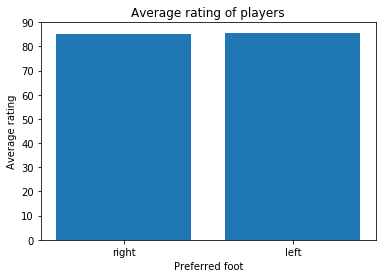

In [39]:
#We do the same for the 100 best rated players to see ny difference.
right_best= df_best.query('preferred_foot== "right"')
left_best= df_best.query('preferred_foot == "left"')
mean_right_best = right_best['overall_rating'].mean()
mean_left_best = left_best['overall_rating'].mean()

print(mean_left_best, mean_right_best)
locations = [1, 2]
heights = [mean_right_best, mean_left_best]
labels = ['right', 'left']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average rating of players')
plt.xlabel('Preferred foot')
plt.ylabel('Average rating');

<h2> The statistics shows that there are no clear difference between the two preferred foot in the performance</h2>

<a id='conclusions'></a>
## Conclusions

> <h3> Regarding the physical conditions of the players and the relation with the rating, the statitic showed slight postive correlation with age and bmi </h3>
><h3> However, there is a clear positive correlation with aggression and penalties and more evident for the number of match played. The exception if the prefered foot (left or right) which seems to have no influence on performance </h3>
> <h1>We can conclude that it seems that the physical constitution of player may play a role in the high rating but, more clearly, the most rated players are more to be aggressive and make faults as they are also playing more.</h1>

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295